# 12 Linear Algebra: Singular Value Decomposition

One can always decompose a matrix $\mathsf{A}$ 
\begin{gather}
\mathsf{A} = \mathsf{U}\,\text{diag}(w_j)\,\mathsf{V}^{T}\\
\mathsf{U}^T \mathsf{U} = \mathsf{U} \mathsf{U}^T = 1\\
\mathsf{V}^T \mathsf{V} = \mathsf{V} \mathsf{V}^T = 1
\end{gather}
where the $w_j$ are the _singular values_.

The inverse (if it exists) can be directly calculated from the SVD:
$$
\mathsf{A}^{-1} = \mathsf{V} \text{diag}(1/w_j) \mathsf{U}^T
$$

## Solving ill-conditioned coupled linear equations 

In [ ]:
import numpy as np

### Non-singular matrix 

In [111]:
A = np.array([
        [1, 2, 3],
        [3, 2, 1],
        [-1, -2, -6],
    ])
b = np.array([0, 1, -1])

In [112]:
np.linalg.solve(A, b)

array([ 0.83333333, -0.91666667,  0.33333333])

In [113]:
U, w, VT = np.linalg.svd(A)
print(w)

[ 7.74140616  2.96605874  0.52261473]


In [114]:
U.dot(np.diag(w).dot(VT))

array([[ 1.,  2.,  3.],
       [ 3.,  2.,  1.],
       [-1., -2., -6.]])

In [115]:
np.allclose(A, U.dot(np.diag(w).dot(VT)))

True

In [116]:
inv_w = 1/w
print(inv_w)

[ 0.1291755   0.33714774  1.91345545]


In [117]:
A_inv = VT.T.dot(np.diag(inv_w)).dot(U.T)
print(A_inv)

[[ -8.33333333e-01   5.00000000e-01  -3.33333333e-01]
 [  1.41666667e+00  -2.50000000e-01   6.66666667e-01]
 [ -3.33333333e-01  -1.11022302e-16  -3.33333333e-01]]


In [118]:
np.allclose(A_inv, np.linalg.inv(A))

True

In [119]:
x = A_inv.dot(b)
print(x)
np.allclose(x, np.linalg.solve(A, b))

[ 0.83333333 -0.91666667  0.33333333]


True

In [120]:
A.dot(x)

array([ -6.66133815e-16,   1.00000000e+00,  -1.00000000e+00])

In [121]:
np.allclose(A.dot(x), b)

True

### Singular matrix

In [376]:
C = np.array([
     [ 0.87119148,  0.9330127,  -0.9330127],
     [ 1.1160254,   0.04736717, -0.04736717],
     [ 1.1160254,   0.04736717, -0.04736717],
    ])
b1 = np.array([ 2.3674474,  -0.24813392, -0.24813392])
b2 = np.array([0, 1, 1])

In [310]:
np.linalg.solve(C, b1)

LinAlgError: Singular matrix

In [377]:
U, w, VT = np.linalg.svd(C)
print(w)

[  1.99999999e+00   1.00000000e+00   2.46519033e-32]


In [378]:
U.dot(np.diag(w).dot(VT))

array([[ 0.87119148,  0.9330127 , -0.9330127 ],
       [ 1.1160254 ,  0.04736717, -0.04736717],
       [ 1.1160254 ,  0.04736717, -0.04736717]])

In [379]:
np.allclose(C, U.dot(np.diag(w).dot(VT)))

True

In [380]:
singular_values = np.abs(w) < 1e-12
print(singular_values)

[False False  True]


In [381]:
inv_w = 1/w
inv_w[singular_values] = 0
print(inv_w)

[ 0.5  1.   0. ]


In [382]:
C_inv = VT.T.dot(np.diag(inv_w)).dot(U.T)
print(C_inv)

[[-0.04736717  0.46650635  0.46650635]
 [ 0.5580127  -0.21779787 -0.21779787]
 [-0.5580127   0.21779787  0.21779787]]


In [383]:
x1 = C_inv.dot(b1)
print(x1)

[-0.34365138  1.4291518  -1.4291518 ]


In [384]:
C.dot(x1) 

array([ 2.3674474 , -0.24813392, -0.24813392])

In [385]:
C.dot(x1) - b1

array([ -4.44089210e-16,   4.99600361e-16,   4.99600361e-16])

* The columns $U_{\cdot, i}$ of $\mathsf{U}$ (i.e. `U.T[i]` or `U[:, i]`) corresponding to non-zero $w_i$, i.e. $\{i : w_i \neq 0\}$, form the basis for the _range_ of the matrix $\mathsf{A}$.
* The columns $V_{\cdot, i}$ of $\mathsf{V}$ (i.e. `V.T[i]` or `V[:, i]`) corresponding to zero $w_i$, i.e. $\{i : w_i = 0\}$, form the basis for the _null space_ of the matrix $\mathsf{A}$.

Note that `x1` can be written as a linear combination of `U.T[0]` and `U.T[1]`:

In [408]:
x1

array([-0.34365138,  1.4291518 , -1.4291518 ])

In [402]:
U.T

array([[ -7.07106782e-01,  -4.99999999e-01,  -4.99999999e-01],
       [  7.07106780e-01,  -5.00000001e-01,  -5.00000001e-01],
       [ -2.47010760e-16,  -7.07106781e-01,   7.07106781e-01]])

In [410]:
VT

array([[-0.8660254 , -0.35355339,  0.35355339],
       [-0.5       ,  0.61237244, -0.61237244],
       [-0.        , -0.70710678, -0.70710678]])

In [411]:
U.T[0].dot(x1), U.T[1].dot(x1)

(0.24299822382783731, -0.24299822305983199)

In [412]:
VT[2].dot(x1)

2.2204460492503131e-16

In [413]:
U.T[0].dot(x1) * U.T[0] + U.T[1].dot(x1) * U.T[1] + 2 * VT[2]

array([-0.34365138, -1.41421356, -1.41421356])

The solution vector $x_2$ is in the null space: 

In [349]:
x2 = C_inv.dot(b2)
print(x2)
print(C.dot(x2))
print(C.dot(x2) - b2)

[ 0.9330127  -0.43559574  0.43559574]
[ -3.33066907e-16   1.00000000e+00   1.00000000e+00]
[ -3.33066907e-16  -3.33066907e-16  -3.33066907e-16]


In [352]:
C.dot(10*x2)

array([ -3.55271368e-15,   1.00000000e+01,   1.00000000e+01])

In [350]:
C.dot(VT[2])

array([  0.00000000e+00,  -6.93889390e-18,  -6.93889390e-18])

In [351]:
VT[2]

array([-0.        , -0.70710678, -0.70710678])

In [138]:
null_basis = VT[singular_values]

In [140]:
C.dot(null_basis.T)

array([[  0.00000000e+00],
       [  4.44089210e-16],
       [  0.00000000e+00]])

## SVD for fewer equations than unknowns
$M$ equations for $N$ unknowns with $M < N$:
* no unique solutions (underdetermined)
* $N-M$ dimensional family of solutions
* SVD: at least $N-M$ zero or negligible $w_j$: columns of $\mathsf{V}$ corresponding to singular $w_j$ span the solution space when added to a particular solution.

## SVD for more equations than unknowns
$M$ equations for $N$ unknowns with $M > N$:
* no exact solutions in general (overdetermined)
* but: SVD can provide best solution in the least-square sense
  $$
  \mathbf{x} = \mathsf{V}\, \text{diag}(1/w_j)\, \mathsf{U}^{T}\, \mathbf{b}
  $$
  where 
  * $\mathbf{x}$ is a $N$-dimensional vector of the unknowns,
  * $\mathsf{V}$ is a $N \times M$ matrix
  * the $w_j$ form a square $M \times M$ matrix,
  * $\mathsf{U}$ is a $N \times M$ matrix (and $\mathsf{U}^T$ is a $M \times N$ matrix), and
  * $\mathbf{b}$ is the $M$-dimensional vector of the given values
  
It provides the $\mathbf{x}$ that minimizes the residual

$$
\mathbf{r} := |\mathsf{A}\mathbf{x} - \mathbf{b}|.
$$


### Linear least-squares fitting 

This is the *liner least-squares fitting problem*: Given data points $(x_i, y_i)$, fit to a linear model $y(x)$, which can be any linear combination of functions of $x$.

For example: 
$$
y(x) = a_1 + a_2 x + a_3 x^2 + \dots + a_M x^{M-1}
$$
or in general
$$
y(x) = \sum_{k=1}^M a_k X_k(x)
$$

The goal is to determine the coefficients $a_k$.

Define the **merit function**
$$
\chi^2 = \sum_{i=1}^N \left[ \frac{y_i - \sum_{k=1}^M a_k X_k(x_i)}{\sigma_i}\right]^2
$$
(sum of squared deviations, weighted with standard deviations $\sigma_i$ on the $y_i$).

Best parameters $a_k$ are the ones that *minimize $\chi^2$*.

*Design matrix* $\mathsf{A}$ ($N \times M$, $N \geq M$), vector of measurements $\mathbf{b}$ ($N$-dim) and parameter vector $\mathbf{a}$ ($M$-dim):

\begin{align}
A_{ij} &= \frac{X_j(x_i)}{\sigma_i}\\
b_i &= \frac{y_i}{\sigma_i}\\
\mathbf{a} &= (a_1, a_2, \dots, a_M)
\end{align}


Minimum occurs when the derivative vanishes:
$$
0 = \frac{\partial\chi^2}{\partial a_k} = \sum_{i=1}^N {\sigma_i}^{-2} \left[ y_i - \sum_{k=1}^M a_k X_k(x_i) \right] X_k(x_i), \quad 1 \leq k \leq M
$$
($M$ coupled equations)
\begin{align}
\sum_{j=1}^{M} \alpha_{kj} a_j &= \beta_k\\
\mathsf{\alpha}\mathbf{a} = \mathsf{\beta}
\end{align}
with the $M \times M$ matrix
\begin{align}
\alpha_{kj} &= \sum_{i=1}^N \frac{X_j(x_i) X_k(x_i)}{\sigma_i^2}\\
\mathsf{\alpha} &= \mathsf{A}^T \mathsf{A}
\end{align}
and the vector of length $M$
\begin{align}
\beta_{k} &= \sum_{i=1}^N \frac{y_i X_k(x_i)}{\sigma_i^2}\\
\mathsf{\beta} &= \mathsf{A}^T \mathbf{b}
\end{align}

The inverse of $\mathsf{\alpha}$ is related to the uncertainties in the parameters:
$$
\mathsf{C} := \mathsf{\alpha}^{-1}
$$
in particular
$$
\sigma(a_i) = C_ii
$$
(and the $C_{ij}$ are the co-variances).

#### Solution of the linear least-squares fitting problem with SVD
We need to solve the overdetermined system of $M$ coupled equations
\begin{align}
\sum_{j=1}^{M} \alpha_{kj} a_j &= \beta_k\\
\mathsf{\alpha}\mathbf{a} = \mathsf{\beta}
\end{align}

SVD finds $\mathbf{a}$ that minimizes
$$
\chi^2 = |\mathsf{A}\mathbf{a} - \mathbf{b}|
$$

The errors are
$$
\sigma^2(a_j) = \sum_{i=1}^{M} \left(\frac{V_{ji}}{w_i}\right)^2
$$

#### Example
Synthetic data with noise:

In [419]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [443]:
def signal(x, noise=0):
    r = np.random.uniform(-noise, noise, len(x))
    return 3*np.sin(x) - 2*np.sin(3*x) + np.sin(4*x) + r

In [446]:
X = np.linspace(-5, 5, 100)
Y = signal(X, noise=5)

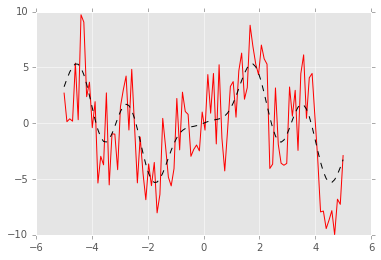

In [448]:
plt.plot(X, Y, 'r-', X, signal(X, noise=0), 'k--')

In [450]:
def fitfunc(x, a):
    return a[0]*np.cos(x) + a[1]*np.sin(x) + \
           a[2]*np.cos(2*x) + a[3]*np.sin(2*x) + \
           a[4]*np.cos(3*x) + a[5]*np.sin(3*x) + \
           a[6]*np.cos(4*x) + a[7]*np.sin(4*x)

def basisfuncs(x):
    return np.array([np.cos(x), np.sin(x), 
                     np.cos(2*x), np.sin(2*x), 
                     np.cos(3*x), np.sin(3*x), 
                     np.cos(4*x), np.sin(4*x)])

In [453]:
M = 8
sigma = 1.
alpha = np.zeros((M, M))
beta = np.zeros(M)
for x in X:
    Xk = basisfuncs(x)
    for k in range(M):
        for j in range(M):
            alpha[k, j] += Xk[k]*Xk[j]
for x, y in zip(X, Y):
    beta += y * basisfuncs(x)/sigma

In [455]:
U, w, VT = np.linalg.svd(alpha)
V = VT.T

In [460]:
w

array([ 62.20340809,  62.19816957,  61.96089878,  59.46747947,
        46.19370933,  43.63360538,  33.06518796,  31.27754141])

In [457]:
w_inv = 1/w
w_inv[np.abs(w) < 1e-12] = 0
alpha_inv = V.dot(np.diag(w_inv)).dot(U.T)

In [461]:
a_values = alpha_inv.dot(beta)

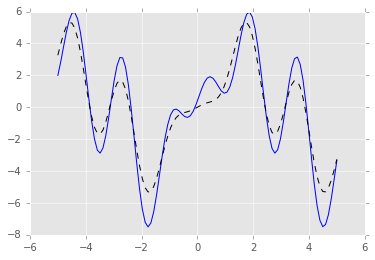

In [465]:
plt.plot(X, fitfunc(X, a_values), 'b-')
plt.plot(X, signal(X, noise=0), 'k--')